In [1]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt

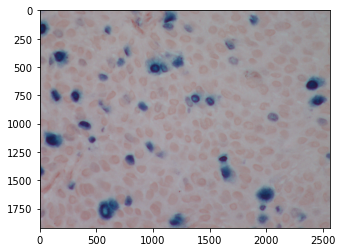

In [2]:
img1=cv2.imread("3053 KI67.jpg")
plt.imshow(img1)

In [3]:
hist_c,bins_c = np.histogram(img1.flatten(),256,[0,256])

# Generating the cumulative distribution function of the original image
cdf_c = hist_c.cumsum()
cdf_c_normalized = cdf_c * hist_c.max()/ cdf_c.max()

In [4]:
image_yuv = cv2.cvtColor(img1, cv2.COLOR_BGR2YUV)

# Applying Histogram Equalization on the original imageof the Y channel
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

# Convert the YUV image back to RGB format
image_c_equalized = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

# Generating the histogram of the equalized image
hist_c_equalized, bins_c_equalized = np.histogram(image_c_equalized.flatten(),256,[0,256])

# Generating the cumulative distribution function of the original image
cdf_c_equalized = hist_c_equalized.cumsum()
cdf_c_equalized_normalized = cdf_c_equalized * hist_c_equalized.max()/ cdf_c_equalized.max()

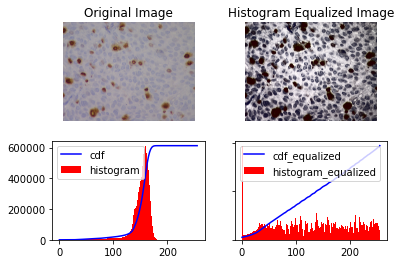

In [5]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(cv2.cvtColor(image_c_equalized, cv2.COLOR_BGR2RGB))
axs[0, 1].axis('off')
axs[0, 1].set_title('Histogram Equalized Image')


axs[1, 0].plot(cdf_c_normalized, color = 'b')
axs[1, 0].hist(img1.flatten(),256,[0,256], color = 'r')
axs[1, 0].legend(('cdf','histogram'), loc = 'upper left')



axs[1, 1].plot(cdf_c_equalized_normalized, color = 'b')
axs[1, 1].hist(image_c_equalized.flatten(),256,[0,256], color = 'r')
axs[1, 1].legend(('cdf_equalized','histogram_equalized'), loc = 'upper left')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

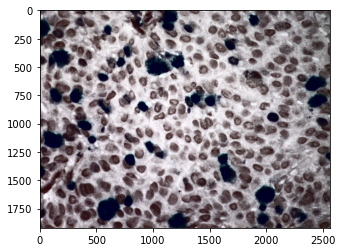

In [6]:
plt.imshow(image_c_equalized)

In [7]:
save_img=cv2.cvtColor(image_c_equalized, cv2.COLOR_BGR2RGB)
cv2.imwrite("3053_contrast.jpg",save_img)

True

In [8]:
blur = cv2.GaussianBlur(image_c_equalized,(13,13),0)

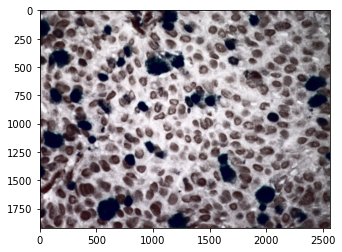

In [9]:
plt.imshow(blur)

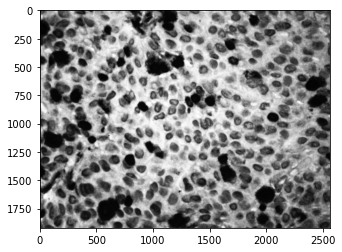

In [10]:
gray1=cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
plt.imshow(gray1,'gray')

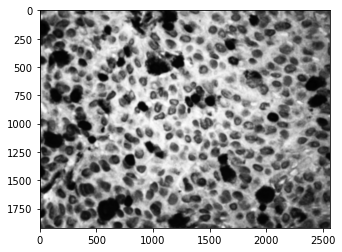

In [11]:
blur = cv2.GaussianBlur(gray1,(21,21),0)
plt.imshow(blur,'gray')

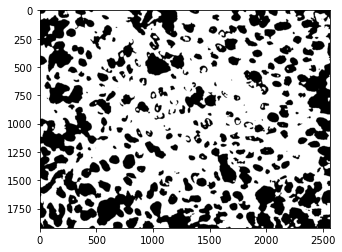

In [12]:
threshold,binary2=cv2.threshold(blur,100,255,cv2.THRESH_BINARY)
plt.imshow(binary2,'gray')

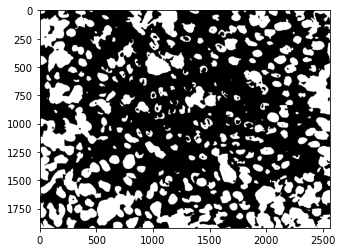

In [13]:
binary=binary2-255
plt.imshow(binary,'gray')

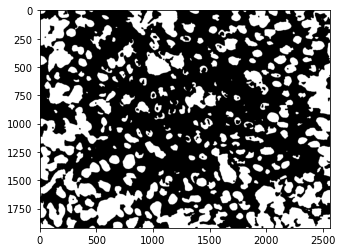

In [14]:
kernel = np.ones((3,3),np.uint8)
closed = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel=kernel, iterations=4)
plt.imshow(closed,'gray')

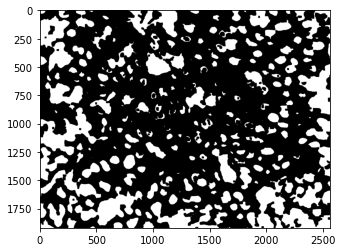

In [15]:
kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(closed, kernel, iterations=5)
plt.imshow(erosion,'gray')

In [16]:
contour2, hierarchy = cv2.findContours(image=erosion.copy(), mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)

In [17]:
contour_all=len(contour2)
len(contour2)

273

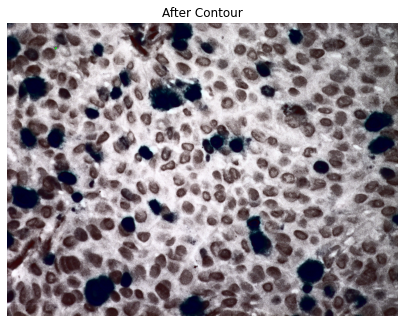

In [18]:
equalized=image_c_equalized
cv2.drawContours(image=equalized,contours=contour2,contourIdx=249, color=(0,255,0), thickness=5)
plt.figure(figsize=(7,7)), plt.title("After Contour"), plt.imshow(equalized, cmap="gray"), plt.axis("off");

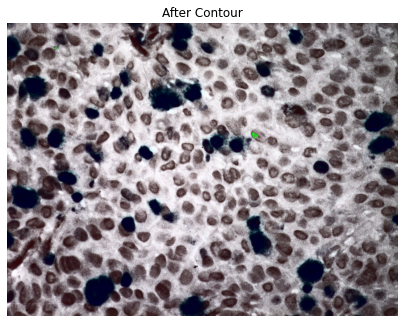

In [19]:
cv2.drawContours(image=equalized,contours=contour2,contourIdx=167, color=(0,255,0), thickness=5)
plt.figure(figsize=(7,7)), plt.title("After Contour"), plt.imshow(equalized, cmap="gray"), plt.axis("off");

2.0 0
18.0 1
46.0 2
365.5 3
3345.5 4
3980.0 5
4169.0 6
4650.0 7
6541.0 8
15.0 9
13.0 10
1904.0 11
2176.5 12
8.0 13
4026.5 14
2390.0 15
555.0 16
2048.0 17
3010.0 18
17361.5 19
5154.0 20
61306.5 21
3409.5 22
3373.5 23
6053.0 24
6796.0 25
4759.5 26
16.0 27
4819.5 28
42.5 29
6529.0 30
926.0 31
2303.5 32
4916.0 33
72803.5 34
7171.5 35
38037.5 36
2368.5 37
581.0 38
441.5 39
5987.5 40
5135.5 41
1552.5 42
113893.0 43
4537.5 44
4854.5 45
569.5 46
2433.5 47
744.5 48
6263.5 49
1834.5 50
8411.0 51
75.5 52
0.0 53
2039.0 54
928.0 55
849.0 56
40779.0 57
278.5 58
401.5 59
12878.5 60
2812.5 61
3348.5 62
2031.0 63
10311.5 64
90.5 65
2988.0 66
5328.5 67
1190.0 68
4.5 69
843.5 70
1463.0 71
4667.0 72
580.0 73
1725.0 74
9674.5 75
2240.0 76
2439.0 77
2100.0 78
1757.5 79
237.5 80
2200.0 81
26557.0 82
325.5 83
5573.0 84
28506.0 85
301.5 86
1879.5 87
658.0 88
1746.5 89
2110.0 90
1230.5 91
486.0 92
10941.5 93
1339.0 94
19985.0 95
286.5 96
3001.5 97
4071.5 98
149.0 99
531.0 100
2565.5 101
5030.0 102
1843.5 103
21

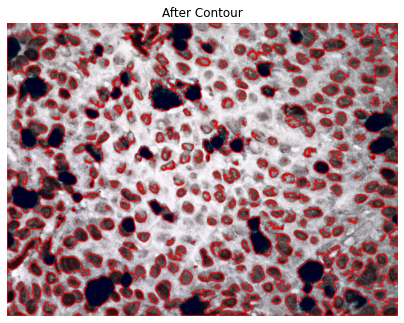

In [20]:
cells=0
for i in range(len(contour2)):
    cv2.drawContours(image=image_c_equalized,contours=contour2,contourIdx=i, color=(255,0,0), thickness=5)
    area=cv2.contourArea(contour2[i])
    print(area,i)
    if(area>600):
        if(area>5500):
            cells=cells+(area//5500)
        else:
            cells=cells+1 
plt.figure(figsize=(7,7)), plt.title("After Contour"), plt.imshow(image_c_equalized, cmap="gray"), plt.axis("off");

In [21]:
cells


314.0

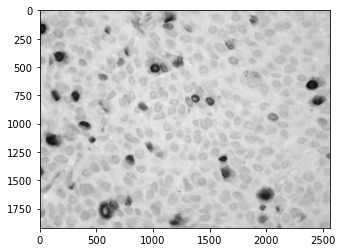

In [22]:
gray_org=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_org,'gray')

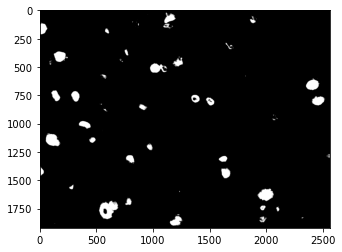

In [23]:
thresh, binary = cv2.threshold(gray_org, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
plt.imshow(binary,'binary')

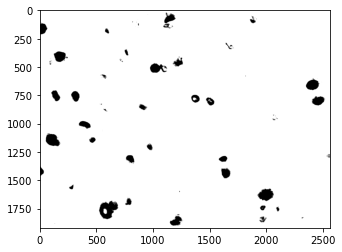

In [24]:
binary=binary-255
plt.imshow(binary,'binary')

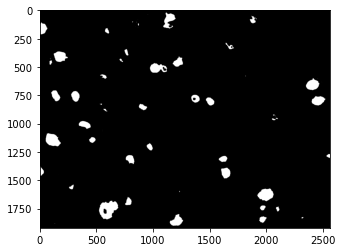

In [25]:
kernel = np.ones((3,3),np.uint8)
closed = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel=kernel, iterations=5)
plt.imshow(closed,'gray')

In [26]:
contour2, hierarchy = cv2.findContours(image=closed.copy(), mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)

In [27]:
contour_brown=len(contour2)
len(contour2)

65

4.0 0
122.0 1
2341.0 2
6945.0 3
791.0 4
1490.0 5
18459.0 6
2575.5 7
33.0 8
10984.0 9
927.5 10
0.0 11
5713.5 12
1795.0 13
2813.5 14
3976.0 15
702.5 16
2107.0 17
1935.5 18
0.0 19
10618.5 20
0.0 21
0.0 22
4514.0 23
291.5 24
105.5 25
0.0 26
0.0 27
7.5 28
79.5 29
306.5 30
2400.5 31
90.5 32
3540.0 33
6842.5 34
3833.5 35
4990.5 36
4791.0 37
0.0 38
0.0 39
0.0 40
8097.0 41
14.0 42
1058.5 43
8754.5 44
575.0 45
383.5 46
2.0 47
4690.5 48
7729.0 49
1090.5 50
1424.0 51
1068.5 52
0.5 53
0.0 54
0.0 55
112.0 56
4771.5 57
3.5 58
27.5 59
0.0 60
0.0 61
1799.0 62
1.0 63
7653.5 64


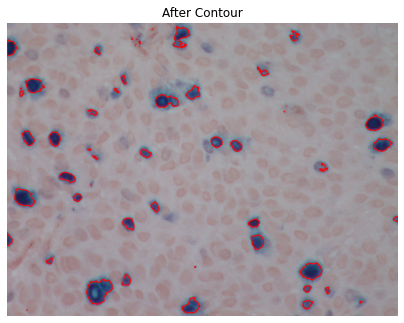

In [28]:
cells_brown=0
for i in range(len(contour2)):
    cv2.drawContours(image=img1,contours=contour2,contourIdx=i, color=(255,0,0), thickness=5)
    area=cv2.contourArea(contour2[i])
    print(area,i)
    if(area>1):
        cells_brown=cells_brown+1
    
plt.figure(figsize=(7,7)), plt.title("After Contour"), plt.imshow(img1, cmap="gray"), plt.axis("off");

In [29]:
cells_brown

50

In [31]:
#manualcount_blue=295
#manualcount_brown=47

actual_percent_positivity=(47/295)*100
actual_percent_positivity


15.932203389830507

In [30]:
percent_positivity_1=(cells_brown/cells)*100
percent_positivity_1


15.92356687898089

In [32]:
error_rate = abs((actual_percent_positivity-percent_positivity_1))/actual_percent_positivity
error_rate=error_rate*100
error_rate

0.05420788724758998

In [33]:
accuracy=100-(error_rate)
accuracy

99.94579211275241

In [34]:
#without area manipulations

percent_positivity=(contour_brown/contour_all)*100
percent_positivity


23.809523809523807

In [35]:
error_rate = abs(actual_percent_positivity-percent_positivity)/actual_percent_positivity
error_rate=error_rate*100
error_rate

49.442755825734544

In [36]:
accuracy=100-(error_rate)
accuracy

50.557244174265456